# Unsupervised learning on sleep_classifiers output data
This Jupyter Notebook assumes that you have already run Dr. Olivia Walch's <a href="https://github.com/ojwalch/sleep_classifiers">sleep_classifiers</a> preprocessor script, <a href="https://github.com/ojwalch/sleep_classifiers/tree/master/source/preprocessing">preprocessing_runner.py</a>, and that the acceleration data is stored in <code>[jupyter_notebook_root]/data/motion</code>. Change the path in the second box below, otherwise; the data does have to exist within the Jupyter Lab path, though.

We start by using _k_-means and DBSCAN classification with _k_ = 2 (asleep/awake, hopefully!) to have some other unsupervised models to compare with. In the future, we plan to use the well-known "elbow" method for choosing a _k_-value.
    
Please see also:  
__Walch, O.__ (2019). _Motion and heart rate from a wrist-worn wearable and labeled sleep from polysomnography (version 1.0.0)_. PhysioNet. https://doi.org/10.13026/hmhs-py35   
__Walch, O., Huang, Y., Forger, D., Goldstein, C.__ _Sleep stage prediction with raw acceleration and photoplethysmography heart rate data derived from a consumer wearable device_.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Sleep, vol. 42, issue 12. https://academic.oup.com/sleep/article/42/12/zsz180/5549536


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# Basis for comparison with tensorflow
from sklearn.cluster import KMeans

# Need to have TensorFlow 2.1+ and Keras API installed. 
#!conda install tensorflow keras
import tensorflow as tf
from tensorflow import keras

In [3]:
# Load just one of the participant's data.
accel = pd.read_csv("data/motion/5383425_acceleration.txt", sep=' ', names=['time', 'x', 'y', 'z'])
accel = accel.set_index('time') # Allows for intuitive time-based selection of entries using accel.loc[start_time:end_time]

In [4]:
psg_kmeans = KMeans(n_clusters=2) # n_clusters=6 based on Dr. Walch's paper.
psg_kmeans.fit(accel)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
psg_kmeans_labels = psg_kmeans.labels_ 

In [6]:
colors = plt.cm.Spectral(np.linspace(0, 1, 2))

In [10]:
%matplotlib tk

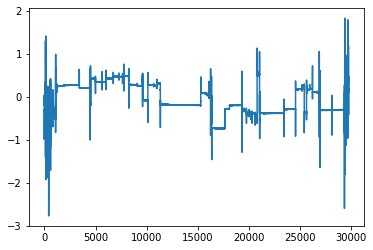

In [12]:
plt.plot(accel['x'])

Text(0.5, 0, 'y accel')

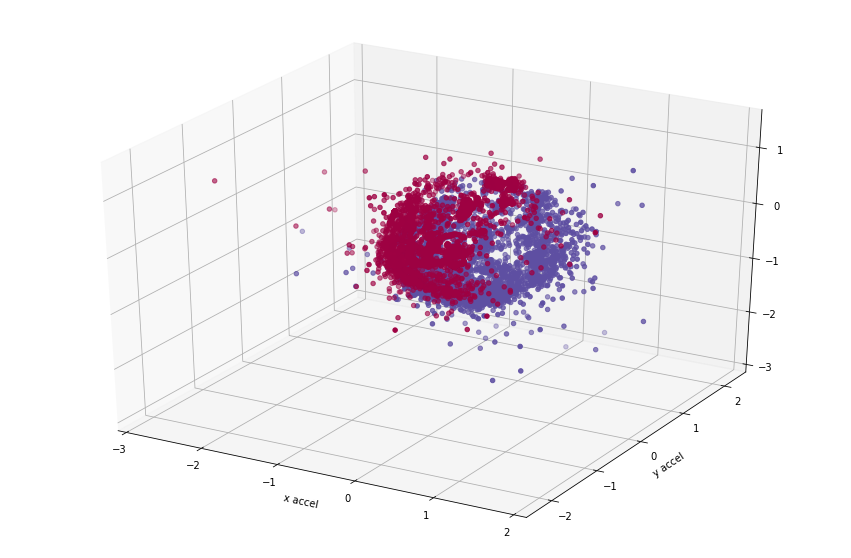

In [9]:
# Uncomment for pop-out window that's interactive. The many data points is pretty punishing to 3d render on my computers, but maybe your GPU is better...
%matplotlib tk
# Uncomment for inline, non-interactive plotting.
#%matplotlib inline 
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection="3d")

for k, col in zip(range(2), colors):
    cluster = (psg_kmeans_labels == k)
    
    ax.scatter(accel['x'][cluster], accel['y'][cluster], accel['z'][cluster], c=[col])
 
ax.set_xlabel('x accel')
ax.set_ylabel('y accel')